<a href="https://colab.research.google.com/github/suhanitatiya/Customer_Lifetime_Value/blob/main/CLV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Customer Lifetime Value Bootcamp**

### **Case study on: Predictive Analytics for Customer Lifetime Value Estimation**


**Objective:**

* To provide the ability to **Estimate CLV** for bank customers.

* To facilitate **targeted marketing strategies** and enhance personalized customer experiences based on **estimated CLV**.

* To enable data-driven **decision-making** in customer relationship management.

* This will therefore facilitate **targeted marketing** strategies and personalised customer experiences.

**Scope of the project:** The algorithms used are as follows:
* Regression analysis
* Customer churn prediction models
  * Logistic Regression
  * Random Forest
  * Gradient Boosting
  * XG Boosting
  


**What is Customer Lifetime Value Estimation?**

* Customer Lifetime Value (CLV) estimation is the process of **predicting the total value** a customer will bring to a business over the entire duration of their relationship. It helps companies assess how much **revenue** each customer segment may generate, allowing for more strategic investment in customer acquisition and retention.

* By accurately estimating CLV, businesses can **focus resources** on high-value customers, optimizing marketing and customer service efforts.

**How is its role in Banking sector ?**
* In banking, CLV estimation plays a crucial role in i**dentifying profitable customers, reducing churn**, and **personalizing services**. Banks can use CLV insights to tailor promotions, cross-sell relevant products, and **deepen customer relationships**. This predictive metric enables banks to **enhance customer experiences** while maximizing long-term financial returns.




We import all the necessary libraries as follows

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
from datetime import datetime, timedelta, date

* **Dataset**:

A real online retail transaction data set of two years: https://archive.ics.uci.edu/ml/datasets/Online+Retail+II

* **About the dataset:**

 The Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail.

In [ ]:
import pandas as pd

# Instead of using encoding, let's use the engine parameter for handling different file types
# For older .xls files, ywe can use the 'xlrd' engine, for newer .xlsx files, we use 'openpyxl'
df = pd.read_excel("/content/4. Customer Lifetime Value.xlsx", engine='openpyxl')


df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


##**EDA- Exploratory Data Analysis**

* Exploratory Data Analysis (EDA) is a way to understand the **structure** and **content of the data before modeling**. For this project, EDA helps us get familiar with **customer demographics, transaction history, and churn information**. This step allows us to identify **patterns, trends, and key features** that can influence CLV and churn.

*  EDA helps identify and handle issues like **missing values, outliers, and irrelevant data**. In this project, it’s essential to clean transaction records and demographic information to ensure **accurate model predictions**. A well-prepared dataset leads to better estimation of customer value and churn likelihood.

* EDA helps pinpoint important variables that significantly **impact CLV and churn predictions**. By analyzing correlations and **distributions**, we can find features like transaction frequency or customer age that are strong predictors. This process **optimizes model accuracy** by focusing on the most influential factors for banking customer value.

In [ ]:
df.shape

(525461, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


Now next, we check for the null values.

In [ ]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,2928
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927
Country,0


Only required features for our analysis:

In [ ]:
def drop_columns(df, columns):
    df1= df.drop(columns, axis=1)
    return df1

In [ ]:
df1= drop_columns(df, ["Description", "Country"])
df1

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0
...,...,...,...,...,...,...
525456,538171,22271,2,2010-12-09 20:01:00,2.95,17530.0
525457,538171,22750,1,2010-12-09 20:01:00,3.75,17530.0
525458,538171,22751,1,2010-12-09 20:01:00,3.75,17530.0
525459,538171,20970,2,2010-12-09 20:01:00,3.75,17530.0


In [ ]:
df1.isnull().sum()

,0
Invoice,0
StockCode,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,107927


Now, we drop the rows which contain the NaN values

In [ ]:
#Let's drop the rows containing NaN
df1.dropna(inplace=True)

Next, we check for the duplicate rows as follows

In [ ]:
df1[df1.duplicated()]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID
371,489517,21912,1,2009-12-01 11:34:00,3.75,16329.0
383,489517,22130,6,2009-12-01 11:34:00,0.85,16329.0
384,489517,22319,12,2009-12-01 11:34:00,0.65,16329.0
385,489517,21913,1,2009-12-01 11:34:00,3.75,16329.0
386,489517,21821,1,2009-12-01 11:34:00,3.75,16329.0
...,...,...,...,...,...,...
523258,538035,20728,3,2010-12-09 13:03:00,1.65,16065.0
523356,538051,22659,2,2010-12-09 13:24:00,1.95,18041.0
525170,538155,21907,1,2010-12-09 16:52:00,2.10,16907.0
525293,538166,21915,5,2010-12-09 18:09:00,1.25,17965.0


For instance we check any row as follows

In [ ]:
df1.loc[(df1.Invoice=="489517") & (df1.StockCode=="21912")]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID


In [ ]:
len(df1[df1.duplicated()])

6771

There are a total of 6771 duplicate rows, now let us drop them as follows

In [ ]:
df1.drop(df1[df1.duplicated()].index, axis=0, inplace=True)

In [ ]:
df1.shape

(410763, 6)

In [ ]:
# now, no "NULL" and "duplicate" data
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 410763 entries, 0 to 525460
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      410763 non-null  object        
 1   StockCode    410763 non-null  object        
 2   Quantity     410763 non-null  int64         
 3   InvoiceDate  410763 non-null  datetime64[ns]
 4   Price        410763 non-null  float64       
 5   Customer ID  410763 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 21.9+ MB


In [ ]:
df1.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0


**Handling Columns**


* Handling columns means **selecting, renaming, creating**, or **removing** columns in a dataset to ensure the data is organized and relevant for analysis. It is necessary in order to improve **data quality** and focus on meaningful features, which enhances the accuracy and efficiency of model predictions.








Let's create a new feature: "TotalPrice"

In [ ]:
df2= df1.copy()
df2["TotalPrice"] = df2["Quantity"] * df2["Price"]

In [ ]:
for i in df2.columns:
    print(i, "column, unique values: ", df2[i].unique())
    print("************")
    print(" ")

Invoice column, unique values:  [489434 489435 489436 ... 538169 538170 538171]
************
 
StockCode column, unique values:  [85048 '79323P' '79323W' ... 22936 22935 22933]
************
 
Quantity column, unique values:  [   12    48    24    10    18     3    16     4     2     6     8     1
    28    30    60    32    56     9    25    36    20   -12    -6    -4
   -24    -3    -2   576   288    27    64   160     5    -1    72    50
    54     7   800    11    58   192    96   144   100   180   216    15
   240   108    33    90    81   -81   -48    17    -5    40    -8    -9
    13    21   120   200   168    19   280   128  -150   -18   -23    80
   300   450    14    61   480    -7    46   504    45  4320  5184  4008
    22   600   505   500    23    47   432   252    75   -16  -504  -600
  -252  -246   -36   360   107    49    42    66   -10    34    52   400
    70   936   -32   -60   -96   -50  -120    35   -64  -168   -30   256
  1500   320   130  1002    26  1080    29   

In [ ]:
for i in df2.columns:
    print(i, "column, unique values: ", df2[i].nunique())
    print("************")
    print("")

Invoice column, unique values:  23587
************

StockCode column, unique values:  4031
************

Quantity column, unique values:  500
************

InvoiceDate column, unique values:  21786
************

Price column, unique values:  664
************

Customer ID column, unique values:  4383
************

TotalPrice column, unique values:  3649
************



Observed some negative values the Quantity and Price columns. Let's check the value containing 0 in the Quantity and Price columns:

In [ ]:
df2.shape

(410763, 7)

In [ ]:
df2.loc[(df2["Quantity"]<=0) | (df2["Price"]<=0)]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
178,C489449,22087,-12,2009-12-01 10:33:00,2.95,16321.0,-35.40
179,C489449,85206A,-6,2009-12-01 10:33:00,1.65,16321.0,-9.90
180,C489449,21895,-4,2009-12-01 10:33:00,4.25,16321.0,-17.00
181,C489449,21896,-6,2009-12-01 10:33:00,2.10,16321.0,-12.60
182,C489449,22083,-12,2009-12-01 10:33:00,2.95,16321.0,-35.40
...,...,...,...,...,...,...,...
524695,C538123,22956,-2,2010-12-09 15:41:00,2.10,12605.0,-4.20
524696,C538124,M,-4,2010-12-09 15:43:00,0.50,15329.0,-2.00
524697,C538124,22699,-1,2010-12-09 15:43:00,2.95,15329.0,-2.95
524698,C538124,22423,-1,2010-12-09 15:43:00,12.75,15329.0,-12.75


Let's drop them...

In [ ]:
df3= df2[(df2['Price'] > 0)]

In [ ]:
df3= df3[(df3['Quantity'] > 0)]


In [ ]:
df2.shape

(410763, 7)

In [ ]:
df3.shape

(400916, 7)

In [ ]:
df3.loc[(df3["Quantity"]<=0) | (df3["Price"]<=0)]

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice


Let's find the non-numeric stock codes:

In [ ]:
# ALL ONLY non-numeric stock codes
wrong_stock_codes= df3[df3["StockCode"].astype(str).str.contains(r"^[a-zA-Z''-'\s]{1,40}$")]["StockCode"].unique().tolist()

df3[df3["StockCode"].isin(wrong_stock_codes)].groupby(["StockCode"]).agg({"StockCode": "count"})

,StockCode
StockCode,
ADJUST,32
BANK CHARGES,20
D,5
M,420
PADS,14
POST,738


In [ ]:
df3[df3["StockCode"].isin(wrong_stock_codes)].groupby(["StockCode"]).agg({"StockCode": "count"}).sum()

,0
StockCode,1229


In [ ]:
df3= df3[~df3["StockCode"].isin(wrong_stock_codes)].reset_index(drop=True)

In [ ]:
# Other non-numeric stock codes
wrong_stock_codes2= df3[df3["StockCode"].astype(str).str.contains(r"[a-zA-Z]{3,}")]["StockCode"].unique().tolist()
df3[df3["StockCode"].isin(wrong_stock_codes2)].groupby(["StockCode"]).agg({"StockCode": "count"})

,StockCode
StockCode,
ADJUST2,3
TEST001,9
TEST002,1


In [ ]:
df3[df3["StockCode"].isin(wrong_stock_codes2)].groupby(["StockCode"]).agg({"StockCode": "count"}).sum()

,0
StockCode,13


Let's drop them:

In [ ]:
df3= df3[~df3["StockCode"].isin(wrong_stock_codes2)].reset_index(drop=True)
df3

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,83.40
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,81.00
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,81.00
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,100.80
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,30.00
...,...,...,...,...,...,...,...
399669,538171,22271,2,2010-12-09 20:01:00,2.95,17530.0,5.90
399670,538171,22750,1,2010-12-09 20:01:00,3.75,17530.0,3.75
399671,538171,22751,1,2010-12-09 20:01:00,3.75,17530.0,3.75
399672,538171,20970,2,2010-12-09 20:01:00,3.75,17530.0,7.50


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399674 entries, 0 to 399673
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      399674 non-null  object        
 1   StockCode    399674 non-null  object        
 2   Quantity     399674 non-null  int64         
 3   InvoiceDate  399674 non-null  datetime64[ns]
 4   Price        399674 non-null  float64       
 5   Customer ID  399674 non-null  float64       
 6   TotalPrice   399674 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 21.3+ MB


Let's convert the type of column "InvoiceDate" to pandas datetime

In [ ]:
df3.InvoiceDate = pd.to_datetime(df3.InvoiceDate)

Let's convert the "Customer ID" column to a categorical column:

In [ ]:
df3["Customer ID"]= df3["Customer ID"].astype('object')
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399674 entries, 0 to 399673
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      399674 non-null  object        
 1   StockCode    399674 non-null  object        
 2   Quantity     399674 non-null  int64         
 3   InvoiceDate  399674 non-null  datetime64[ns]
 4   Price        399674 non-null  float64       
 5   Customer ID  399674 non-null  object        
 6   TotalPrice   399674 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 21.3+ MB


##**Lifetime Value Prediction**

* Lifetime value prediction estimates the **total revenue** a customer will generate over their **entire relationship with a bank**. Predicting lifetime value helps **identify high-value customers** who are likely to contribute more to the bank's revenue.

* This helps the bank to **allocate resources effectively**, focusing on retention and personalized services for these valuable customers.

* By using **historical transaction data and customer behavior**, lifetime value prediction creates a financial forecast for each customer. For the bank, this means understanding which customers might respond well to **targeted marketing** or loyalty programs.

* This prediction model not only helps increase revenue but also enhances **customer satisfaction** by tailoring interactions to meet customer needs and preferences.














We are ready to predict LTV. Here, we will use 8 months of data, calculate RFM and use it for predicting next 16 months.

In [ ]:
df_LTV= df3.copy()

In [ ]:
print("First date in dataset: ", df_LTV['InvoiceDate'].min())

First date in dataset:  2009-12-01 07:45:00


In [ ]:
print("Last date in dataset: ", df_LTV['InvoiceDate'].max())

Last date in dataset:  2010-12-09 20:01:00


Now we create 2 dataframes:

In [ ]:
df_last= df_LTV[(df_LTV.InvoiceDate >=  datetime.strptime("2010-8-1", '%Y-%m-%d')) &\
                (df_LTV.InvoiceDate <= df_LTV['InvoiceDate'].max())].reset_index(drop=True)

In [ ]:
df_first= df_LTV[(df_LTV.InvoiceDate <  datetime.strptime("2010-8-1", '%Y-%m-%d')) &\
                 (df_LTV.InvoiceDate >= df_LTV['InvoiceDate'].min())].reset_index(drop=True)

In [ ]:
df_first

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
0,489434,85048,12,2009-12-01 07:45:00,6.95,13085.0,83.40
1,489434,79323P,12,2009-12-01 07:45:00,6.75,13085.0,81.00
2,489434,79323W,12,2009-12-01 07:45:00,6.75,13085.0,81.00
3,489434,22041,48,2009-12-01 07:45:00,2.10,13085.0,100.80
4,489434,21232,24,2009-12-01 07:45:00,1.25,13085.0,30.00
...,...,...,...,...,...,...,...
218240,517704,22659,6,2010-07-30 17:08:00,1.95,14031.0,11.70
218241,517704,21658,3,2010-07-30 17:08:00,3.95,14031.0,11.85
218242,517704,22328,8,2010-07-30 17:08:00,2.95,14031.0,23.60
218243,517704,37370,72,2010-07-30 17:08:00,1.06,14031.0,76.32


In [ ]:
df_last

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,TotalPrice
0,517707,22066,2,2010-08-01 10:06:00,1.45,12843.0,2.90
1,517707,21889,1,2010-08-01 10:06:00,1.25,12843.0,1.25
2,517708,22415,2,2010-08-01 10:09:00,7.95,17243.0,15.90
3,517708,22470,4,2010-08-01 10:09:00,2.95,17243.0,11.80
4,517708,22483,2,2010-08-01 10:09:00,2.95,17243.0,5.90
...,...,...,...,...,...,...,...
181424,538171,22271,2,2010-12-09 20:01:00,2.95,17530.0,5.90
181425,538171,22750,1,2010-12-09 20:01:00,3.75,17530.0,3.75
181426,538171,22751,1,2010-12-09 20:01:00,3.75,17530.0,3.75
181427,538171,20970,2,2010-12-09 20:01:00,3.75,17530.0,7.50


Now we will create the RFM scoring

In [ ]:
RFM_df= pd.DataFrame(df_first['Customer ID'].unique())
RFM_df.columns = ['Customer ID']
RFM_df

,Customer ID
0,13085.0
1,13078.0
2,15362.0
3,18102.0
4,12682.0
...,...
3132,14346.0
3133,16428.0
3134,17109.0
3135,17735.0


For Recency

In [ ]:
recency_df= df_first.groupby('Customer ID')['InvoiceDate'].max().reset_index()
recency_df

,Customer ID,InvoiceDate
0,12346.0,2010-06-28 13:53:00
1,12349.0,2010-04-29 13:20:00
2,12355.0,2010-05-21 11:59:00
3,12358.0,2010-06-07 12:28:00
4,12359.0,2010-06-22 10:24:00
...,...,...
3132,18281.0,2010-05-11 10:49:00
3133,18283.0,2010-03-28 13:21:00
3134,18285.0,2010-02-17 10:24:00
3135,18286.0,2009-12-16 10:45:00


In [ ]:
last_day_df_first= df_first['InvoiceDate'].max()
last_day_df_first

Timestamp('2010-07-30 17:08:00')

In [ ]:
recency_df['Recency']= recency_df['InvoiceDate'].apply(lambda x: (last_day_df_first - x).days)
recency_df

,Customer ID,InvoiceDate,Recency
0,12346.0,2010-06-28 13:53:00,32
1,12349.0,2010-04-29 13:20:00,92
2,12355.0,2010-05-21 11:59:00,70
3,12358.0,2010-06-07 12:28:00,53
4,12359.0,2010-06-22 10:24:00,38
...,...,...,...
3132,18281.0,2010-05-11 10:49:00,80
3133,18283.0,2010-03-28 13:21:00,124
3134,18285.0,2010-02-17 10:24:00,163
3135,18286.0,2009-12-16 10:45:00,226


In [ ]:
RFM_df= pd.merge(RFM_df, recency_df[['Customer ID','Recency']], on='Customer ID')
RFM_df

,Customer ID,Recency
0,13085.0,182
1,13078.0,3
2,15362.0,241
3,18102.0,0
4,12682.0,15
...,...,...
3132,14346.0,0
3133,16428.0,0
3134,17109.0,0
3135,17735.0,0


In [ ]:
# To order cluster method
def order_cluster(cluster_field_name, target_field_name,df,ascending):
    new_cluster_field_name = 'new_' + cluster_field_name
    df_new = df.groupby(cluster_field_name)[target_field_name].mean().reset_index()
    df_new = df_new.sort_values(by=target_field_name,ascending=ascending).reset_index(drop=True)
    df_new['index'] = df_new.index
    df_final = pd.merge(df,df_new[[cluster_field_name,'index']], on=cluster_field_name)
    df_final = df_final.drop([cluster_field_name],axis=1)
    df_final = df_final.rename(columns={"index":cluster_field_name})
    return df_final

Next we build 4 clusters for recency and add it to dataframe as follows

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Recency']])
RFM_df['RecencyCluster'] = kmeans.predict(RFM_df[['Recency']])
RFM_df

,Customer ID,Recency,RecencyCluster
0,13085.0,182,3
1,13078.0,3,0
2,15362.0,241,3
3,18102.0,0,0
4,12682.0,15,0
...,...,...,...
3132,14346.0,0,0
3133,16428.0,0,0
3134,17109.0,0,0
3135,17735.0,0,0


In [ ]:
RFM_df= order_cluster('RecencyCluster', 'Recency', RFM_df, False)
RFM_df

,Customer ID,Recency,RecencyCluster
0,13085.0,182,0
1,13078.0,3,3
2,15362.0,241,0
3,18102.0,0,3
4,12682.0,15,3
...,...,...,...
3132,14346.0,0,3
3133,16428.0,0,3
3134,17109.0,0,3
3135,17735.0,0,3


In [ ]:
RecencyCluster_Stats = RFM_df.groupby("RecencyCluster")["Recency"].describe()
RecencyCluster_Stats

,count,mean,std,min,25%,50%,75%,max
RecencyCluster,,,,,,,,
0,336.0,213.937500,22.769034,177.0,190.00,226.0,234.0,241.0
1,573.0,138.233857,18.923228,107.0,123.00,136.0,152.0,176.0
2,922.0,73.824295,17.400049,47.0,57.25,73.0,88.5,106.0
3,1306.0,19.693721,13.966339,0.0,7.00,18.0,31.0,46.0


For Frequency

In [ ]:
frequency_df= df_first.groupby(["Customer ID"]).agg({"Invoice":"nunique"}).reset_index()
frequency_df.rename(columns={"Invoice":"Frequency"}, inplace=True)
frequency_df

,Customer ID,Frequency
0,12346.0,2
1,12349.0,1
2,12355.0,1
3,12358.0,2
4,12359.0,5
...,...,...
3132,18281.0,1
3133,18283.0,3
3134,18285.0,1
3135,18286.0,1


In [ ]:
RFM_df= pd.merge(RFM_df, frequency_df, on='Customer ID')
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency
0,13085.0,182,0,6
1,13078.0,3,3,20
2,15362.0,241,0,1
3,18102.0,0,3,61
4,12682.0,15,3,14
...,...,...,...,...
3132,14346.0,0,3,1
3133,16428.0,0,3,2
3134,17109.0,0,3,1
3135,17735.0,0,3,1


In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Frequency']])
RFM_df['FrequencyCluster'] = kmeans.predict(RFM_df[['Frequency']])
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,13085.0,182,0,6,2
1,13078.0,3,3,20,3
2,15362.0,241,0,1,0
3,18102.0,0,3,61,1
4,12682.0,15,3,14,3
...,...,...,...,...,...
3132,14346.0,0,3,1,0
3133,16428.0,0,3,2,0
3134,17109.0,0,3,1,0
3135,17735.0,0,3,1,0


In [ ]:
RFM_df= order_cluster('FrequencyCluster', 'Frequency', RFM_df, True)
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster
0,13085.0,182,0,6,1
1,13078.0,3,3,20,2
2,15362.0,241,0,1,0
3,18102.0,0,3,61,3
4,12682.0,15,3,14,2
...,...,...,...,...,...
3132,14346.0,0,3,1,0
3133,16428.0,0,3,2,0
3134,17109.0,0,3,1,0
3135,17735.0,0,3,1,0


In [ ]:
FrequencyCluster_Stats= RFM_df.groupby("FrequencyCluster")["Frequency"].describe()
FrequencyCluster_Stats

,count,mean,std,min,25%,50%,75%,max
FrequencyCluster,,,,,,,,
0,2292.0,1.606021,0.752484,1.0,1.0,1.0,2.0,3.0
1,727.0,5.741403,1.870234,4.0,4.0,5.0,7.0,11.0
2,101.0,17.217822,5.944079,12.0,13.0,15.0,19.0,36.0
3,17.0,58.058824,15.562256,38.0,46.0,56.0,62.0,88.0


For Monetary

In [ ]:
monetary_df= df_first.groupby('Customer ID')['TotalPrice'].sum().reset_index()
monetary_df.columns = ['Customer ID', 'Monetary']
monetary_df.head()

,Customer ID,Monetary
0,12346.0,169.36
1,12349.0,1068.52
2,12355.0,488.21
3,12358.0,1697.93
4,12359.0,2012.03


In [ ]:
RFM_df= pd.merge(RFM_df, monetary_df, on='Customer ID')
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary
0,13085.0,182,0,6,1,2017.20
1,13078.0,3,3,20,2,9560.24
2,15362.0,241,0,1,0,310.75
3,18102.0,0,3,61,3,222525.28
4,12682.0,15,3,14,2,6845.16
...,...,...,...,...,...,...
3132,14346.0,0,3,1,0,672.93
3133,16428.0,0,3,2,0,418.01
3134,17109.0,0,3,1,0,184.69
3135,17735.0,0,3,1,0,271.02


In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(RFM_df[['Monetary']])
RFM_df['MonetaryCluster']= kmeans.predict(RFM_df[['Monetary']])
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster
0,13085.0,182,0,6,1,2017.20,0
1,13078.0,3,3,20,2,9560.24,0
2,15362.0,241,0,1,0,310.75,0
3,18102.0,0,3,61,3,222525.28,3
4,12682.0,15,3,14,2,6845.16,0
...,...,...,...,...,...,...,...
3132,14346.0,0,3,1,0,672.93,0
3133,16428.0,0,3,2,0,418.01,0
3134,17109.0,0,3,1,0,184.69,0
3135,17735.0,0,3,1,0,271.02,0


In [ ]:
RFM_df= order_cluster('MonetaryCluster', 'Monetary', RFM_df, True)
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster
0,13085.0,182,0,6,1,2017.20,0
1,13078.0,3,3,20,2,9560.24,0
2,15362.0,241,0,1,0,310.75,0
3,18102.0,0,3,61,3,222525.28,3
4,12682.0,15,3,14,2,6845.16,0
...,...,...,...,...,...,...,...
3132,14346.0,0,3,1,0,672.93,0
3133,16428.0,0,3,2,0,418.01,0
3134,17109.0,0,3,1,0,184.69,0
3135,17735.0,0,3,1,0,271.02,0


In [ ]:
MonetaryCluster_Stats= RFM_df.groupby("MonetaryCluster")["Monetary"].describe()
MonetaryCluster_Stats

,count,mean,std,min,25%,50%,75%,max
MonetaryCluster,,,,,,,,
0,3099.0,1070.028261,1477.097908,1.55,256.4100,561.25,1256.15,12916.15
1,34.0,25074.632353,12736.899487,13776.74,15635.6675,19927.71,30937.89,69700.34
2,3.0,125126.283333,16035.526751,106707.71,119699.2600,132690.81,134335.57,135980.33
3,1.0,222525.280000,NaN,222525.28,222525.2800,222525.28,222525.28,222525.28


Let's calculate Overall Scores:

* 0 to 2: Low Value
* 3 to 4: Mid Value
* 5+: High Value

In [ ]:
#overall scoring
RFM_df['OverallScore'] = RFM_df['RecencyCluster'] + RFM_df['FrequencyCluster'] + RFM_df['MonetaryCluster']
RFM_df['Segment'] = 'Low-Value'
RFM_df.loc[RFM_df['OverallScore']>2,'Segment'] = 'Mid-Value'
RFM_df.loc[RFM_df['OverallScore']>4,'Segment'] = 'High-Value'
RFM_df

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment
0,13085.0,182,0,6,1,2017.20,0,1,Low-Value
1,13078.0,3,3,20,2,9560.24,0,5,High-Value
2,15362.0,241,0,1,0,310.75,0,0,Low-Value
3,18102.0,0,3,61,3,222525.28,3,9,High-Value
4,12682.0,15,3,14,2,6845.16,0,5,High-Value
...,...,...,...,...,...,...,...,...,...
3132,14346.0,0,3,1,0,672.93,0,3,Mid-Value
3133,16428.0,0,3,2,0,418.01,0,3,Mid-Value
3134,17109.0,0,3,1,0,184.69,0,3,Mid-Value
3135,17735.0,0,3,1,0,271.02,0,3,Mid-Value


Our feature set is ready, let’s calculate 16 months CLV for each customer which we are going to use for training our model.

There is no cost specified in the dataset. That’s why Monetary becomes our CLV directly:

In [ ]:
monetary_df_last= df_last.groupby('Customer ID')['TotalPrice'].sum().reset_index()
monetary_df_last.columns = ['Customer ID', 'lastMonthsMonetary']
monetary_df_last['Customer ID']= monetary_df_last['Customer ID'].astype("object")
monetary_df_last.head()

,Customer ID,lastMonthsMonetary
0,12347.0,1323.32
1,12348.0,221.16
2,12349.0,1152.62
3,12351.0,300.93
4,12352.0,343.80


In [ ]:
monetary_df_last= monetary_df_last[monetary_df_last["lastMonthsMonetary"] <= monetary_df_last["lastMonthsMonetary"].quantile(0.99)]

In [ ]:
monetary_df_last.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3165 entries, 0 to 3196
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         3165 non-null   object 
 1   lastMonthsMonetary  3165 non-null   float64
dtypes: float64(1), object(1)
memory usage: 74.2+ KB


Let's merge our 8 months and 16 months dataframes to see the feature set we have:

In [ ]:
RFM_df_NEW = pd.merge(RFM_df, monetary_df_last, on='Customer ID', how='left')
RFM_df_NEW = RFM_df_NEW.fillna(0)
RFM_df_NEW['Customer ID']= RFM_df_NEW['Customer ID'].astype("object")
RFM_df_NEW

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary
0,13085.0,182,0,6,1,2017.20,0,1,Low-Value,0.00
1,13078.0,3,3,20,2,9560.24,0,5,High-Value,7344.27
2,15362.0,241,0,1,0,310.75,0,0,Low-Value,302.33
3,18102.0,0,3,61,3,222525.28,3,9,High-Value,0.00
4,12682.0,15,3,14,2,6845.16,0,5,High-Value,3820.53
...,...,...,...,...,...,...,...,...,...,...
3132,14346.0,0,3,1,0,672.93,0,3,Mid-Value,621.24
3133,16428.0,0,3,2,0,418.01,0,3,Mid-Value,220.48
3134,17109.0,0,3,1,0,184.69,0,3,Mid-Value,225.73
3135,17735.0,0,3,1,0,271.02,0,3,Mid-Value,3863.89


In [ ]:
RFM_df_NEW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         3137 non-null   object 
 1   Recency             3137 non-null   int64  
 2   RecencyCluster      3137 non-null   int64  
 3   Frequency           3137 non-null   int64  
 4   FrequencyCluster    3137 non-null   int64  
 5   Monetary            3137 non-null   float64
 6   MonetaryCluster     3137 non-null   int64  
 7   OverallScore        3137 non-null   int64  
 8   Segment             3137 non-null   object 
 9   lastMonthsMonetary  3137 non-null   float64
dtypes: float64(2), int64(6), object(2)
memory usage: 245.2+ KB


Here, we want to create CLV segments. Because it makes it more actionable and easy to communicate with other people.

By applying K-means clustering, we can identify our existing CLV groups and build segments on top of it.

Considering business part of this analysis, we need to treat customers differently based on their predicted CLV.

For this example, we will apply clustering and have 3 segments (number of segments really depends on your business dynamics and goals):

* Low CLV
* Mid CLV
* High CLV

We are going to apply K-means clustering to decide segments and observe their characteristics:

In [ ]:
#creating 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(RFM_df_NEW[['lastMonthsMonetary']])
RFM_df_NEW['LTVCluster'] = kmeans.predict(RFM_df_NEW[['lastMonthsMonetary']])

In [ ]:
RFM_df_NEW = order_cluster('LTVCluster', 'lastMonthsMonetary', RFM_df_NEW, True)
RFM_df_NEW

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary,LTVCluster
0,13085.0,182,0,6,1,2017.20,0,1,Low-Value,0.00,0
1,13078.0,3,3,20,2,9560.24,0,5,High-Value,7344.27,2
2,15362.0,241,0,1,0,310.75,0,0,Low-Value,302.33,0
3,18102.0,0,3,61,3,222525.28,3,9,High-Value,0.00,0
4,12682.0,15,3,14,2,6845.16,0,5,High-Value,3820.53,1
...,...,...,...,...,...,...,...,...,...,...,...
3132,14346.0,0,3,1,0,672.93,0,3,Mid-Value,621.24,0
3133,16428.0,0,3,2,0,418.01,0,3,Mid-Value,220.48,0
3134,17109.0,0,3,1,0,184.69,0,3,Mid-Value,225.73,0
3135,17735.0,0,3,1,0,271.02,0,3,Mid-Value,3863.89,1


In [ ]:
#creating a new cluster dataframe
df_LTVCluster = RFM_df_NEW.copy()
df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe()

,count,mean,std,min,25%,50%,75%,max
LTVCluster,,,,,,,,
0,2589.0,289.409776,339.901219,0.00,0.000,163.20,507.9700,1196.76
1,480.0,2092.964937,796.656026,1200.24,1431.325,1856.40,2552.6250,4474.20
2,68.0,6938.583676,1973.874869,4540.82,5187.170,6462.27,8196.0425,11785.18


We have finished CLV clustering.

2 is the best with average 12686 CLV whereas 0 is the worst with 644.



## **Building the Machine Learning Model**

* We will start to build ML model. Building an ML model involves **training algorithms on data** to recognize** patterns and make predictions** based on learned insights.

* It’s a process of **selecting, training, and evaluating models** to solve specific tasks, like estimating customer lifetime value or predicting churn.

* Now, we should perform some steps including some **feature engineering, performing split data**, etc.



In [ ]:
df_ML= df_LTVCluster.copy()

In [ ]:
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer ID         3137 non-null   object 
 1   Recency             3137 non-null   int64  
 2   RecencyCluster      3137 non-null   int64  
 3   Frequency           3137 non-null   int64  
 4   FrequencyCluster    3137 non-null   int64  
 5   Monetary            3137 non-null   float64
 6   MonetaryCluster     3137 non-null   int64  
 7   OverallScore        3137 non-null   int64  
 8   Segment             3137 non-null   object 
 9   lastMonthsMonetary  3137 non-null   float64
 10  LTVCluster          3137 non-null   int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 269.7+ KB


Next we convert the columns which we thought to be categorical column into a categorical column as follows

In [ ]:
for i in ["Customer ID","RecencyCluster","FrequencyCluster", "MonetaryCluster", "Segment", "LTVCluster"]:
    df_ML[i]= df_ML[i].astype('object')

For Numerical columns as follows

In [ ]:
Num= df_ML.select_dtypes(exclude='object').columns.tolist()
Num

['Recency', 'Frequency', 'Monetary', 'OverallScore', 'lastMonthsMonetary']

Next we apply StandardScaler for numerical columns as follows

In [ ]:
from sklearn.preprocessing import StandardScaler
scalerNum= StandardScaler()

for cols in Num:
    df_ML[cols] = scalerNum.fit_transform(df_ML[[cols]])

For Categorical columns as follows

In [ ]:
Cat= df_ML.select_dtypes(include='object').columns.tolist()
Cat

['Customer ID',
 'RecencyCluster',
 'FrequencyCluster',
 'MonetaryCluster',
 'Segment',
 'LTVCluster']

Next we Convert the categorical columns to numerical by using LabelEncoder:

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_ML = df_ML.apply(lambda x: LabelEncoder().fit_transform(x) if x.dtype == 'object' else x)
df_ML.head()

,Customer ID,Recency,RecencyCluster,Frequency,FrequencyCluster,Monetary,MonetaryCluster,OverallScore,Segment,lastMonthsMonetary,LTVCluster
0,350,1.575357,0,0.483320,1,0.078294,0,-0.979532,1,-0.568967,0
1,346,-1.137663,3,3.059036,2,1.264742,0,1.932376,0,5.320531,2
2,1570,2.469592,0,-0.436578,0,-0.190114,0,-1.707509,1,-0.326524,0
3,3040,-1.183132,3,10.602202,3,34.762096,3,4.844284,0,-0.568967,0
4,143,-0.955784,3,1.955158,2,0.837686,0,1.932376,0,2.494782,1


Next we Create X and y where X will be feature set and y is the label - CLV:

In [ ]:
X = df_ML.drop(['LTVCluster','lastMonthsMonetary'], axis=1)
y = df_ML['LTVCluster']

####**Split training and testing datasets**

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [ ]:
models = {
    'K-Nearest Neighbors' : KNeighborsClassifier(),
    'Logistic Regression' : LogisticRegression(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boosting' : GradientBoostingClassifier(),
    'XG Boosting' : xgb.XGBClassifier()
}

In [ ]:
%%time
for name, model in models.items():
    print(f'{name} training started')
    model.fit(X_train, y_train)
    print(f'{name} trained')
    print("*"*40)
print("FINISHED")

K-Nearest Neighbors training started
K-Nearest Neighbors trained
****************************************
Logistic Regression training started
Logistic Regression trained
****************************************
Random Forest training started
Random Forest trained
****************************************
Gradient Boosting training started
Gradient Boosting trained
****************************************
XG Boosting training started
XG Boosting trained
****************************************
FINISHED
CPU times: user 2.69 s, sys: 21.5 ms, total: 2.71 s
Wall time: 3.86 s


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix as CM
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.datasets import make_classification

In [ ]:
for name in models:
    acc_score= round(accuracy_score(y_test, models.get(name).predict(X_test)), 3)
    print(f'{name} accuracy score :  {acc_score}')

K-Nearest Neighbors accuracy score :  0.807
Logistic Regression accuracy score :  0.817
Random Forest accuracy score :  0.827
Gradient Boosting accuracy score :  0.825
XG Boosting accuracy score :  0.82


Best accuracy shows 82.7% on the test set. Looks really good.

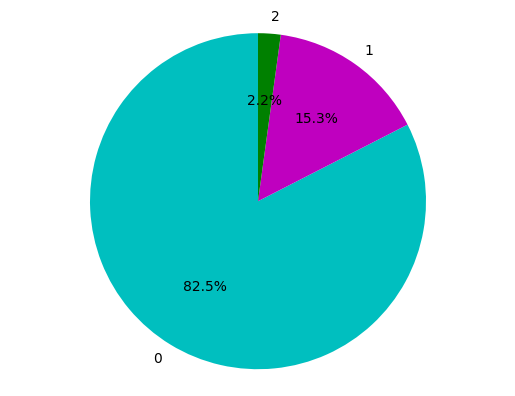

In [ ]:
labels= df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe().index
colors=['c', 'm', 'g']
sizes= df_LTVCluster.groupby('LTVCluster')['lastMonthsMonetary'].describe()["count"]
LTVCluster_Pie= plt.pie(sizes,labels=labels, colors=colors, startangle=90, autopct='%1.1f%%')
plt.axis('equal')
plt.show()

###**Inference:**
* The Biggest cluster we have is **cluster 0** which is **82.5%** of the total base. If we blindly say, every customer belongs to cluster 0, then our **accuracy would be 82.5%.**



We can identify that by looking at classification report as follows

In [ ]:
for name in models:
    print(f'{name} classification report')
    print("-------------------------------")
    print(classification_report(y_test, models.get(name).predict(X_test)))
    print("******************************")
    print(" ")

K-Nearest Neighbors classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       848
           1       0.16      0.02      0.03       157
           2       0.00      0.00      0.00        31

    accuracy                           0.81      1036
   macro avg       0.33      0.33      0.31      1036
weighted avg       0.69      0.81      0.74      1036

******************************
 
Logistic Regression classification report
-------------------------------
              precision    recall  f1-score   support

           0       0.84      0.98      0.90       848
           1       0.28      0.06      0.10       157
           2       0.50      0.06      0.11        31

    accuracy                           0.82      1036
   macro avg       0.54      0.37      0.37      1036
weighted avg       0.74      0.82      0.76      1036

******************************
 
Random Forest classifica

As we handle the Gradient Boosting model, the model successfully identifies 95% of actual cluster 0 customers (recall).


####**Key points for the project**

1. **Data Quality and Preparation:** Ensuring the **data accuracy** and completeness is crucial for **reliable CLV and churn predictions**. **Missing values, outliers, and inconsistent data must be addressed** to avoid misleading results. Quality data enables models to capture true customer behavior patterns effectively.

2. **Feature Selection:** Identifying key features helps to build precise models. Selecting relevant features can **enhance model accuracy and focus on variables that strongly impact customer lifetime value and churn**. This step improves both the efficiency and interpretability of the models.

3. **Model Evaluation Metrics:** Choosing the right metrics, such as Mean Absolute Error for CLV and accuracy for churn prediction, is essential to **measure model performance**. **Proper evaluation** ensures that the models are **effective in real-world scenarios**. Consistent evaluation helps refine the models for better decision-making in banking strategies.

4. **Business Application**: Models should be interpretable so that stakeholders can understand and use **predictions** in **decision-making.**

5. **Scalability:** The models should be scalable to handle **large volumes of customer data** in real-time or regular intervals. This project must consider how CLV and churn predictions will be integrated into banking systems for continuous updates